# (Exploring Suicide Rates Overview 1985 to 2016)
## by (Rawda Rumaieh)

## Preliminary Wrangling

>  a dataset that compares socio-economic info with suicide rates by year and country

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\a8\Documents\DSCourse\Project3\master.csv')
print(df.shape)
print(df.dtypes)

(27820, 12)
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


### What is the structure of your dataset?
> My dataset consists of 27820 and 12 columns
### What is/are the main feature(s) of interest in your dataset?

> country, year,sex, suicides/100k populations, gdp_per_capita, generation, age, suicides_no and HDI

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that GDP/Capita will have the strongest impact  on suicidal rates: the lowe the GDP/Capital, the higher the rate. I also think that there is a relation between number of suicidals and the generation type since each type has faced different obstacles. I assume that not only poverty may impact the suicidal rates some other factors so I will try to understand the lifestyles of countries with highest rates. Also I believe that year and age will also gives us insights

## Univariate Exploration

>I'll start by looking at the distribution of the main variable of interest: suicides/100k pop


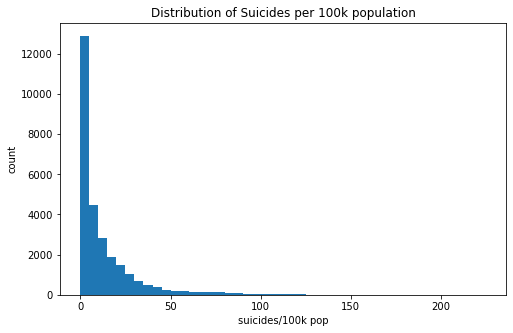

In [3]:
df['suicides/100k pop'].describe()
binsize = 5
bins = np.arange( 0,df['suicides/100k pop'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'suicides/100k pop', bins = bins)
plt.xlabel('suicides/100k pop')
plt.title('Distribution of Suicides per 100k population')
plt.ylabel('count')
plt.show();

> Since it's a long tail distribution,I will put it on a log scale instead


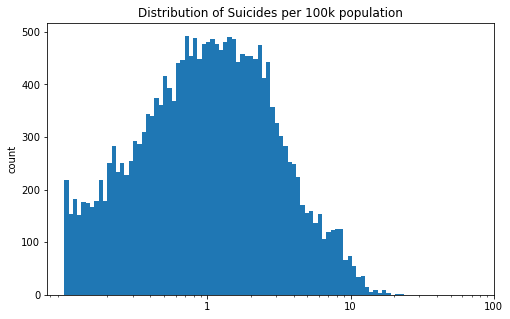

In [4]:
log_binsize = 0.03
bins = 10 ** np.arange(0, np.log10(df['suicides/100k pop'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x ='suicides/100k pop', bins = bins)
plt.title('Distribution of Suicides per 100k population')
plt.xscale('log')
plt.ylabel('count')
plt.xticks([10e0, 10e1, 10e2], [1, 10, 100]);

>Suicides per 100k population in the dataset take on a very small range of values, from about 0.2 at the lowest, to about 12 at the highest. Plotted on a logarithmic scale, the distribution of diamond prices takes on a unimodal shape

>Next up, the first predictor variable of interest: GDP/Capita.

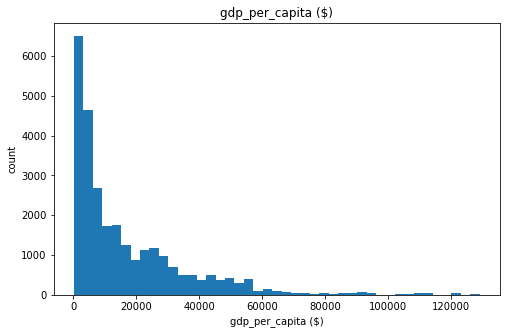

In [5]:
df['gdp_per_capita ($)'].describe()
binsize = 3000
bins = np.arange( 251,df['gdp_per_capita ($)'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'gdp_per_capita ($)', bins = bins)
plt.xlabel('gdp_per_capita ($)')
plt.ylabel('count')
plt.title('gdp_per_capita ($)')

plt.show();

>Since there is a long tail therefore I  will put in a log scale 


In [6]:
np.log10(df['gdp_per_capita ($)']).describe()

count    27820.000000
mean         3.937598
std          0.550657
min          2.399674
25%          3.537441
50%          3.971832
75%          4.395746
max          5.101582
Name: gdp_per_capita ($), dtype: float64

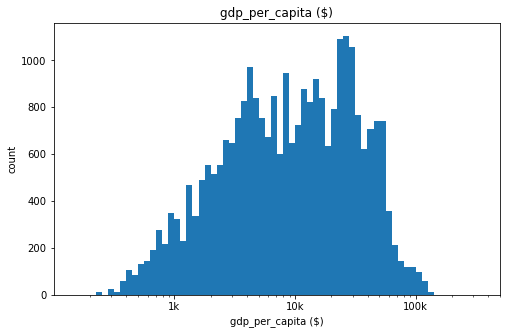

In [7]:
log_binsize = 0.05
bins = 10 ** np.arange(2, np.log10(df['gdp_per_capita ($)'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'gdp_per_capita ($)', bins = bins)
plt.xscale('log')
plt.ylabel('count')
plt.title('gdp_per_capita ($)')
plt.xticks([10e2, 10e3, 10e4,10e5], ['1k', '10k', '100k','1000k'])
plt.xlabel('gdp_per_capita ($)')
plt.xlim([1e2, 50e4])

plt.show()

>GDP per Capita in the dataset take on a very large range of values, from about 500 at the lowest, to about 120k at the highest. Plotted on a logarithmic scale, the distribution of GDP per Capita takes on a Bimodal shape.

In [8]:
df['age'] = df['age'].str.replace('years', '')
df['age'] = df['age'].astype(str).str.replace('+','').str.split('-', expand=True).astype(float).mean(axis=1)
new_df=df[['country','year','sex','suicides/100k pop','gdp_per_capita ($)','generation','age']]
new_df.drop_duplicates()

,country,year,sex,suicides/100k pop,gdp_per_capita ($),generation,age
0,Albania,1987,male,6.71,796,Generation X,19.5
1,Albania,1987,male,5.19,796,Silent,44.5
2,Albania,1987,female,4.83,796,Generation X,19.5
3,Albania,1987,male,4.59,796,G.I. Generation,75.0
4,Albania,1987,male,3.28,796,Boomers,29.5
...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,2.96,2309,Generation X,44.5
27816,Uzbekistan,2014,female,2.58,2309,Silent,75.0
27817,Uzbekistan,2014,male,2.17,2309,Generation Z,9.5
27818,Uzbekistan,2014,female,1.67,2309,Generation Z,9.5


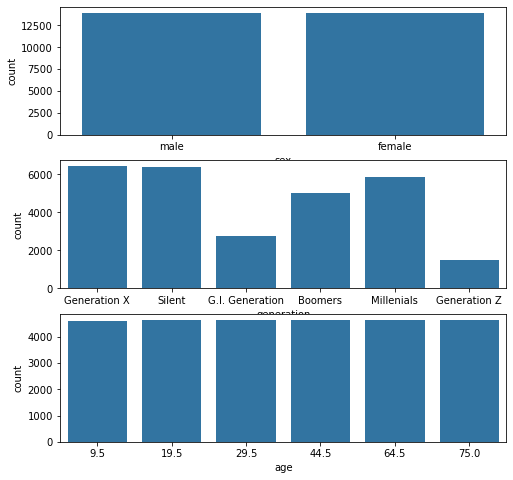

In [9]:
# i will plot country and year individually since I believe.
fig, ax = plt.subplots(nrows=3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = new_df, x = 'sex', color = default_color, ax = ax[0])
sb.countplot(data = new_df, x = 'generation', color = default_color, ax = ax[1])
sb.countplot(data = new_df, x = 'age', color = default_color, ax = ax[2])
plt.show()

>Males and Females in this dataset are nearly of the same count
>Generation X and Silent generation are the most recorded while Generation Z is the least recorded generation
>All ages are of the same count throughout the entire dataset

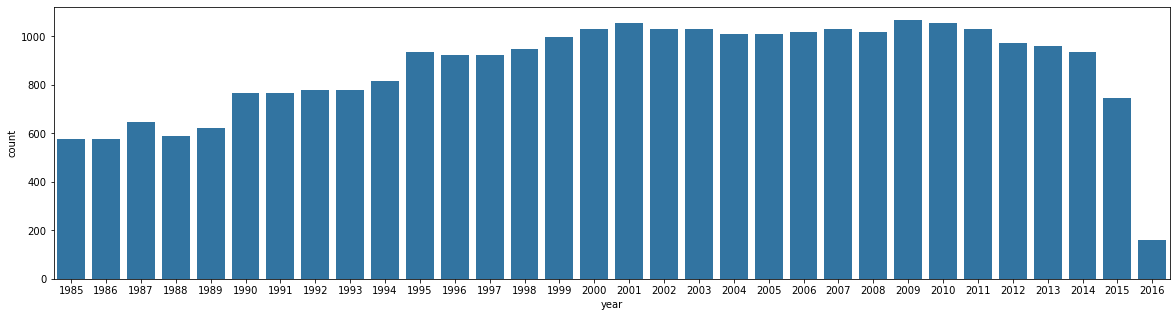

In [10]:
fig,ax = plt.subplots(figsize = [20,5])
sb.countplot(data = new_df, x = 'year', color = default_color, ax = ax)

>Year 2016 was least recorded while year 2009 and year 2001 are the most recorded years

In [11]:
# for the year and country i will choose the most recorded year and countries since they are alot 
Year=new_df.query('year=="2009" or year=="2010" or year=="2001"  or year=="2007"  or year=="2001"  or year=="2011"  or year=="2002" or year=="2003" or year=="2000" or year=="1995"')
YearandCountry=Year.query('country=="Mauritius" or country=="Iceland" or country=="Netherlands" or country=="Austria" or country=="Mexico" or country=="Aruba"')
YandC=['year','country']

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Suicides/100k pop has a long-tailed distribution, with majority at 0 persons commit suicide for every 100k. When plotted on a log-scale, the suicides/100k pop distribution looks roughly bimodal,with one peak between 8 and 9 persons per 100k in population, and a second peak a little below 50 persons per 100k population.

>GDP/Capita has a long-tailed distribution, with a lot of suicidal rates at the low GDP/Capita, and few on the high GDP/Capita. When plotted on a log-scale, the GDP/Capita distribution looks roughly bimodal,with one peak between one million and 100,000, and a second peak a little below 500,000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>I removed the word years from the age column then removing the hyphen and getting the average of the two numbers to get it in a float format

>I took only a group of countries and years (those who are recorded most in the dataset) so I can clearly see the graphs.

>Checking the precentage of duplicates if they are less than 5% i will be dropping them 

>I also made a new dataframe of only columns of interests.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [12]:
numeric_variables = ['suicides/100k pop', 'gdp_per_capita ($)']
categoric_variables = ['sex', 'generation','age']

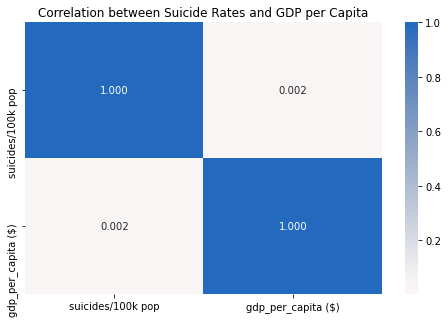

In [13]:
plt.figure(figsize = [8, 5])
sb.heatmap(new_df[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('Correlation between Suicide Rates and GDP per Capita')

plt.show();

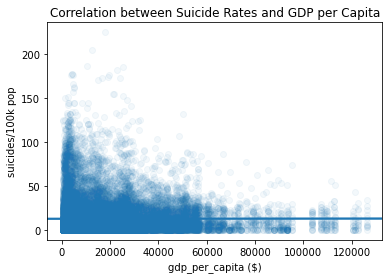

In [14]:
plt.title('Correlation between Suicide Rates and GDP per Capita')
x=sb.regplot(data = new_df, x = 'gdp_per_capita ($)', y = 'suicides/100k pop', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

>The correlation coefficient between suicides/100k pop and GDP per Capita s very low ! approaching zero which means that approximatly there are no relationship between gdp per capita and suicids per 100k population

<Figure size 1800x720 with 0 Axes>

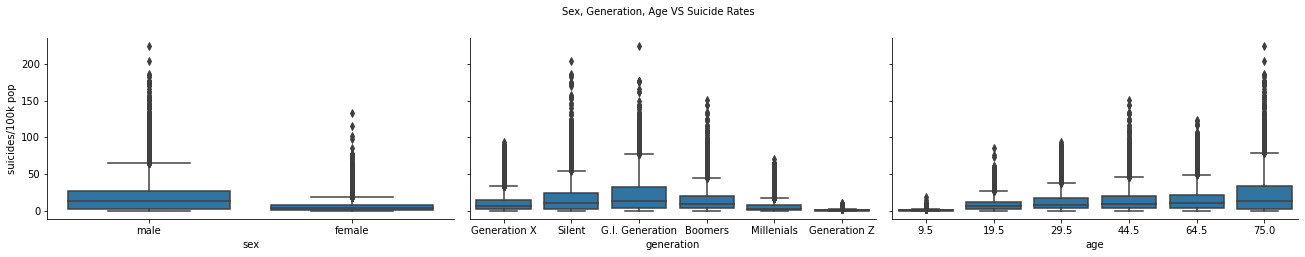

In [15]:
# plot matrix of suicides/100k population feature against categorical features.

def boxgrid(x, y, **kwargs):
    """ Function that plots the barplot in a more efficient way, It takes what should be drawn on X axis and Y axis, Then it calls the
    box plot function from seaborn giving it the two arguments and the deafult color"""
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
#choosing the size of the plot

plt.figure(figsize = [25, 10])

#giving the boxgrid function it's arguments x, and y 
g = sb.PairGrid(data = new_df, y_vars = ['suicides/100k pop'], x_vars = categoric_variables,
                height = 3, aspect = 2)

#calling the function
g.map(boxgrid)
plt.figtext(0.5, 1.1, 'Sex, Generation, Age VS Suicide Rates', ha='center', va='center')

plt.show();

> 1.Male seems to have a wider spread than Females and a larger median, therefore on average males are committing suicides than females from year 1850 till 2016

> 2.GI Generation are the most generation that committed suicicde followed by Silent generation and Boomers where GI having a wider spread 

> 3.People who are 75+ committed suicide the most followed by the fourties and sixties age bracket where they are approximatly the same

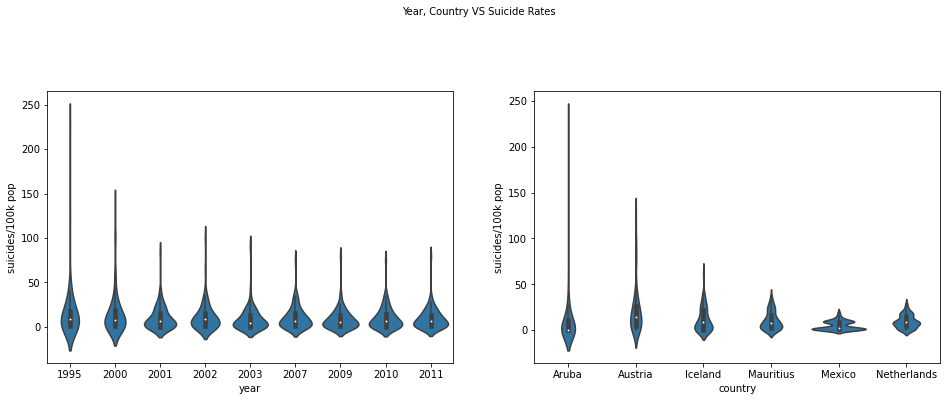

In [16]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,5])
#looping with iterations equal to the number of values in YandC array
for i in range(len(YandC)):
    #putting the value of array elements in a variable called var
    var = YandC[i]
    #calling the violet plot function giving it the data, the x value which is the variable in array that should be plotted verses the constant y variable
    #adjusting the two plots to have the same y axis 
    sb.violinplot(data = YearandCountry, x = var, y = 'suicides/100k pop', ax = ax[i],
               color = default_color)
plt.figtext(0.5, 1.1, 'Year, Country VS Suicide Rates', ha='center', va='center')
plt.show()


> 1.Year 2000, 1995 and 2002 are years where most people suicided with a median equal to 2000 and 20002 

> 2.Most of who committed suicide are from Austria 

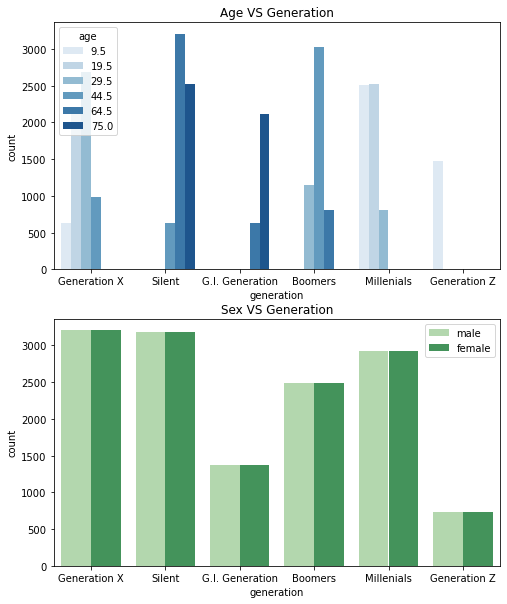

In [17]:
plt.figure(figsize = [8, 10])

# subplot 1: generation vs sex
plt.subplot(2, 1, 1)
sb.countplot(data = new_df, x = 'generation', hue = 'age', palette = 'Blues')
plt.title('Age VS Generation')
# subplot 2: generation vs. age
ax = plt.subplot(2, 1, 2)
sb.countplot(data = new_df, x = 'generation', hue = 'sex', palette = 'Greens')
plt.title('Sex VS Generation')
ax.legend(loc = 'upper right') # re-arrange legend to remove overlapping

plt.show()

> 1. Generation GI is the generation included people with oldes ages while Generation Z is the generation including youngest ages 

> 2. In each generation number of males are equal to number of females

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Contraty to my expectations, the correlation coefficient between suicides/100k pop and  GDP per Capita s very low ! approaching zero which means that approximatly there are no relationship between gdp per capita and suicids per 100k population. I assumed that GDP per Capita will influence the suicidal rate as GDP per capita measures the rate of prosperity of a country based on the economical growth therefore I believed that countries having a prospert life will tend to have less suidical rates

>For the categorical variables verses the suicides/100k population we can now have some insights:
1. *sex*: Male seems to have a wider spread than Females and a larger median, therefore on average males are committing suicides than females from year 1850 till 2016
2. *Generation*: GI Generation are the most generation that committed suicicde followed by Silent generation and Boomers where GI having a wider spread 
3. *Age*: People who are 75+ committed suicide the most followed by the fourties and sixties age bracket where they are approximatly the same
4. *Year*: Year 2000, 1995 and 2002 are years where most people suicided with a median equal to 2000 and 20002 
5. *Country*: Most of who committed suicide are from Austria 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I wanted to see if the gender rates where different throughout the generations. However Males were equal to Females throughout all the generations

> I also wanted to underestand the features of each generation I noticed that GI generations included mostly people of 75+ years old.

## Multivariate Exploration

>The main thing I want to explore in this part of the analysis is how Generation, Sex,Country,Age and Year affects suicidal rates

C:\Users\a8\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\a8\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


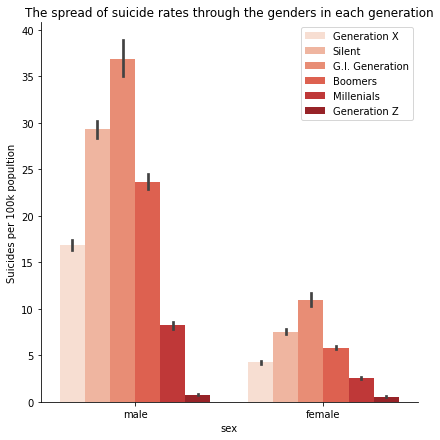

In [18]:
g = sb.factorplot("sex", "suicides/100k pop", "generation",
                   data=new_df, kind="bar",
                   size=6, palette="Reds",
                   legend=False)
g.despine(left=False)
plt.legend(loc='upper right')
g.set_ylabels("Suicides per 100k popultion");
plt.title('The spread of suicide rates through the genders in each generation');

>GI Generation was the most generation that committed suicide, and mostly they were males with a larger propotion than the females who committed suicide from the same generation

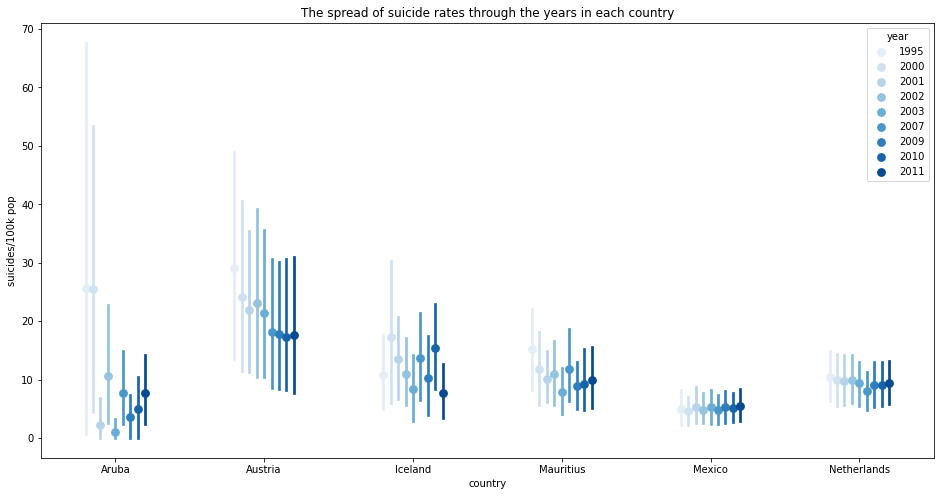

In [19]:
plt.figure(figsize = [16, 8])
sb.pointplot(data = YearandCountry, x = 'country', y = 'suicides/100k pop', hue = 'year',
             palette = 'Blues', linestyles = '', dodge = 0.4);
plt.title('The spread of suicide rates through the years in each country');

>Some countries like Netherlands and Mexico could keep the rates throughout years while other countries had different rates with inconsistent trends like Aruba, Iceland and Mauritius


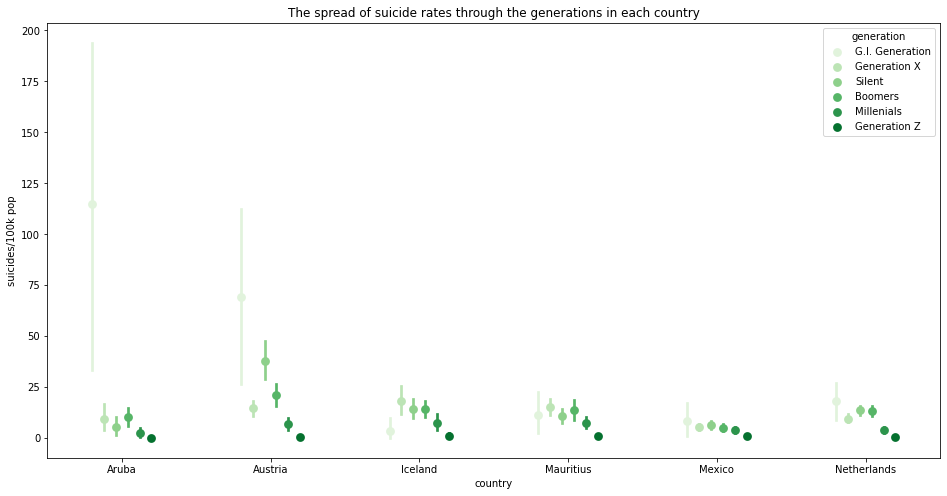

In [20]:
plt.figure(figsize = [16, 8])
sb.pointplot(data = YearandCountry, x = 'country', y = 'suicides/100k pop', hue = 'generation',
             palette = 'Greens', linestyles = '', dodge = 0.4);
plt.title('The spread of suicide rates through the generations in each country');

>GI Generation was the most generation that committed suicide in all the countries except Iceland where generation X committed suicide the most 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> GI Generation was the most generation that committed suicide, and mostly they were males with a larger propotion than the females who committed suicide from the same generation
> Generations of old years tends to committ suicide than younger ages
> Some countries could keep the rates throughout years while other countries had different rates with inconsistent trends.

### Were there any interesting or surprising interactions between features?
>The most recent years incuded less suicidal rates than old years.. it seems that Austria had high rates in all of the chosen years. While Mexico kept its low rates along all years.
>Number of males in GI generations who committed suicide are more then the double of Females.
>GI Generation was the most generation that committed suicide in all the countries except Iceland